<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b> Health Insurance Case study </b>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## About Dataset

This dataset has nearly about 13340 records of customer-insured data. The variables like Age, Sex, BMI, Number of Children, Smokers, and Region are given which will be treated as factors and the charge variable has been given which is the dependent variable. In this dataset, the categorical and numerical types of variables are presented.

### Problem Statement:

The dataset looks simple but it will help understand the identifying factor that can play a role in predicting the medical cost that has been billed by the insurance company. In this problem, Our aim is to predict the health insurance charges given the independent variables.


Source of the dataset:
https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset?resource=download

## Data Definition

**age** : Age of the policyholder (Numeric)

**sex:** Gender of policyholder (Categoric)

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)

**children:** Number of children covered by health insurance / Number of dependents (Numeric)

**smoker:** Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)

**region:** The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.(Categoric)

**charges:**  Individual medical costs billed by health insurance. (Numerical)

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Data Analysis and Preparation](#data_preparation)**
    - 4.1 - [Understand the Data](#Data_Understanding)
        - 4.1.1 - [Data Dimension](#Data_Shape)
        - 4.1.2 - [Data Types](#Data_Types)
        - 4.1.3 - [Summary Statistics](#Summary_Statistics)
        - 4.1.4 - [Missing Values](#Missing_Values)
        - 4.1.5 - [Correlation](#correlation)
        - 4.1.6 - [Analyze Categorical Variables](#categorical)
        - 4.1.7 - [Analyze Relationships Between Target and Categorical Variables](#categorical_numerical)
        - 4.1.8 - [Discover Outliers](#outliers)
    - 4.2 - [Prepare the Data](#Data_Preparation)
        - 4.2.1 - [Check for Normality](#Normality)
        - 4.2.2 - [One-Way Anova](#one_way_anova)
        - 4.2.3 - [Dummy Encoding of Categorical Variables](#dummy)
5. **[Linear Regression (OLS)](#LinearRegression)**
    - 5.0 - [Simple Linear Regression (OLS)](#slr)
    - 5.1 - [Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)](#withLog)
    - 5.2 - [Model Evaluation](#me)
    - 5.2.1 - [Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)](#withoutLog)
    - 5.3 - [Check the Assumptions of Linear Regression](#Assumptions)
       - 5.3.1 - [Detecting Autocorrelation](#Autocorrelation)
       - 5.3.2 - [Detecting Heteroskedasticity](#Heteroskedasticity)
       - 5.3.3 - [Linearity of Residuals](#Linearity_of_Residuals)
       - 5.3.4 - [Normality of Residuals](#Normality_of_Residuals)
    - 5.4 - [Linear Regression with Interaction (OLS)](#Interaction)
6. - **[Gradient Descent](#GD)**
    - 6.1 - [Scaling the Data](#scaling)
    - 6.2 - **[Stochastic Gradient Descent - SGD (sklearn)](#StochasticGradientDescent)**
    - 6.3 - [Linear Regression with SGD using GridSearchCV (sklearn)](#StochasticGradientDescentwithGridSearchCV)
7. **[Feature Selection](#feature_selection)**

8. **[Regularization](#regu)**
    - 8.1 - [Ridge Regularization](#ridge)
    - 8.2 - [Lasso Regularization](#lasso)
    - 8.3 - [Elastic Net Regularization](#elastic)
9. **[Linear Regression model from SKLearn](#lr_sklearn)**
10.**[Cross validation](#cv)**
11. **[Conclusion and Interpretation](#con)**

## Week 1

In [182]:
# !pip install statsmodel   # Statsmodel library should be installed

<a id='import_lib'></a>
## 1. Import Libraries

**Let us import the required libraries and functions**

In [3]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

<a id='set_options'></a>
## 2. Set Options

In [4]:
# the path for reading the data file
# Note: Set your path accordingly
#os.chdir('/Users/Dippies/GL DSE Deliveries/Regression/Nov 22')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# return an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

<a id='Read_Data'></a>
## 3. Read Data

### Read and display data to get insights from the data

In [164]:
# read csv file using pandas
df = pd.read_csv("insurance.csv")

# display the top 5 rows of the dataframe
df.head()

# Note: In order to display more rows, example 10, use head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900000,0,yes,southwest,16884.924000
1,18,male,33.770000,1,no,southeast,1725.552300
2,28,male,33.000000,3,no,southeast,4449.462000
3,33,male,22.705000,0,no,northwest,21984.470610
4,32,male,28.880000,0,no,northwest,3866.855200


<a id='data_preparation'></a>
## 4. Data Analysis and Preparation


### Data preparation is the process of cleaning and transforming raw data prior to building predictive models. 
                        Here we will analyze and prepare data to perform regression analysis:<br>
                        1. Check dimensions of the dataframe in terms of rows and columns <Br>
                        2. Check the data types. Refer data definition to ensure your data types are correct  <br>
                        3. If data types are not as per business context, change the data types as per requirement <br>
                        4. Study summary statistics<br>
                        5. Check for missing values<br>
                        6. Study correlation<br>
                        7. Analyze categorical variables<br>
                        8. Analyze relationship between target variable and categorical variables<br>
                        9. Perform feature engineering<br>
                       10. Detect outliers<br>
                       11. Recheck the correlation<br><br>
                     Note: It is an art to explore data and one will need more and more practice to gain expertise in this area.

<a id='Data_Understanding'></a>
### 4.1 Understand the Dataset

<a id='Data_Shape'></a>
### 4.1.1 Data Dimension

To know the dimensions of the data:

In [165]:
# .shape returns the dimension of the data
df.shape

(1338, 7)

We see the dataframe has 7 columns and 1338 observations.

<a id='Data_Types'></a>
### 4.1.2 Data Types
Data has a variety of data types. The main types stored in pandas dataframes are object, float, int64, bool and datetime64. In order to learn about each attribute, it is always good for us to know the data type of each column.

#### In this section we will: 
                        1. Check data types
                        2. Change the incorrect data types
                        3. Recheck the data types after the conversion

**1. Check data types**

In [166]:
# use .dtypes to view the data type of a variable
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

As we can from the above results that data types of variables have been identified correctly.

However, we will change the sex, smoker, and region datatypes to categorical types.

**2. Change the incorrect data types**

In [167]:
# use .astype() to change the data type
# convert numerical variables to categorical  


# convert object variable 'smoker' to (categorical) variable
df.sex = df.sex.astype('category')

# convert object variable 'smoker' to (categorical) variable
df.smoker = df.smoker.astype('category')

# convert 'object' variable region to (categorical) variable
df.region = df.region.astype('category')

**3. Recheck the data types after the conversion**

In [168]:
# recheck the data types using .dtypes
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

Note the data types are now as per the data definition. Now we can proceed with the analysis.

<a id='Summary_Statistics'></a>
### 4.1.3 Summary Statistics

In our dataset we have numerical and categorical variables. Now we check for summary statistics of all the variables
                        
                        1. For numerical variables, we use .describe()
                        
                        2. For categorical features, we use .describe(include=object) 

**1. For numerical variables, we use .describe()**

In [169]:
# describe the numerical data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.

Note, the average age of a policyholder is about 39 years. Here the mean bmi of a policyholder is 30 (the healthy bmi range is between 18.5 to 24.9).
    
If we observe the count of all the variables, the count is the same as across the variables and we also have seen in the shape function that we had about 1338 records. So we can say that there are no missing values in all the variables.

**2. For categorical features, we use .describe(include=object)**

In [170]:
# describe the categorical data
# include=category: selects the categorical features
df.describe(include = 'category')

# Note: If we pass 'include=category' to the .describe(),
#       it will return descriptive statistics for categorical variables only

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


The summary statistics for categorical variables can be interpreted as:
       
       count - Total number of observations
       
       unique - Number of unique classes in a variable
       
       top - The most repeated class
       
       freq - Frequency of most repeated class
       
There is more number of nonsmokers in the dataset and most of the policyholders are male. And we see that the majority of the policyholder from the southeast based on this data that we have.

In [171]:
df.groupby('region').size()   # Is the data in the categorical attribute balanced? 
                              # Is there any bias hidden in the given data?

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

<a id='Missing_Values'></a>
### 4.1.4 Missing Values

In [172]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We have seen that there are no missing values but we can check using the related functions.

In [173]:
# obtain the total missing values for each variable
# 'isnull().sum()' returns the number of missing values in each variable
# sort the variables on the basis of total null values in the variable using sort_values()
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending=False) 

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# keys:pass a list of column names in parameter  
# axis = 1: concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

,Total,Percentage of Missing Values
age,0,0.000000
sex,0,0.000000
bmi,0,0.000000
children,0,0.000000
smoker,0,0.000000
region,0,0.000000
charges,0,0.000000


As we expected there is no missing value.

<a id='correlation'></a>
### 4.1.5 Correlation

<ul>
    <li>Correlation is the extent of linear relationship among numeric variables</li>
    <li>It indicates the extent to which two variables increase or decrease in parallel</li>
    <li>The value of a correlation coefficient ranges between -1 and 1</li>
    <li> Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which pairs are correlated</li>
    </ul>
    

In order to compute the correlation matrix, we perform the following:

                    1. Filter out only the numeric variables from the dataframe using select_dtypes() function
                    
                    2. Call the corr() function which will return the correlation matrix of numeric variables
                    
                    3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix

**1. Filter out only the numeric variables from the dataframe using select_dtypes() function**

In [174]:
# select the numerical features in the dataset using 'select_dtypes()'
# select_dtypes(include=np.number): considers the numeric variables
df_numeric_features = df.select_dtypes(include=np.number)

# print the names of the numeric variables 
df_numeric_features.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

The dataframe df_numeric_features has 4 numeric variables.

**2.  Call the corr() function which will return the correlation matrix of numeric variables**

In [175]:
# generate the correlation matrix
corr =  df_numeric_features.corr()

# print the correlation matrix
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


**3a. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix**

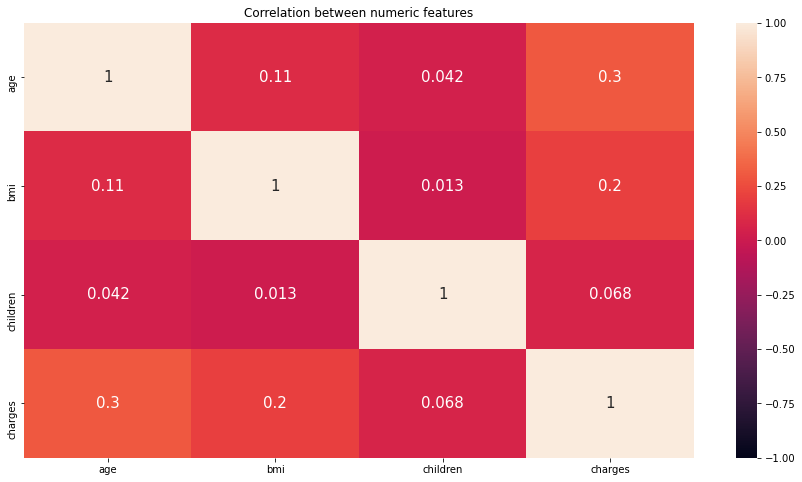

In [176]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: Sets the font size of the annotation
sns.heatmap(corr,  vmax=1.0, vmin=-1.0, annot = True , annot_kws={"size": 15})

# cmap='YlGnBu'

# specify name of the plot using plt.title()
plt.title('Correlation between numeric features')

# display the plot
plt.show()

It can be observed that the numeric variables are less correlated with each other since all the correlation coefficients are close to zero or 0.1. It implies that there will be less multicollinearity in the data. 
                        
Recollect that one of the assumptions of linear regression is that, there should be NO Multicollinearity present in the data.

Correlation does not imply causation. In other words, if two variables are correlated it does not mean that one variable caused the other

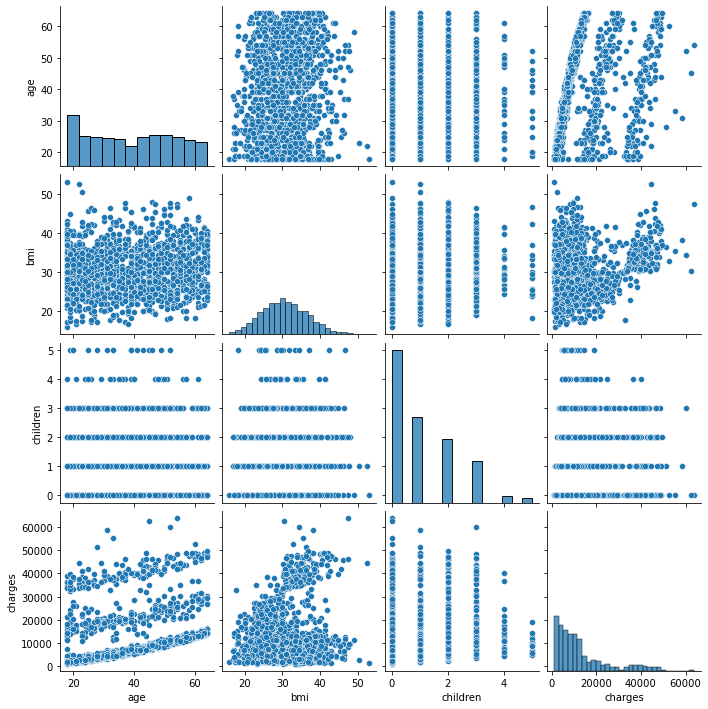

In [188]:
sns.pairplot(df)

<a id='categorical'></a>
### 4.1.6 Analyze Categorical Variables

Categorical variables are those in which the values are labeled categories. The values, distribution, and dispersion of categorical variables are best understood with bar plots.

First let us print the summary statistics of the categorical features.

In [177]:
# display the summary statistics of categorical variables
# include=objec: selects the categoric features
df.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


There are 3 categorical variables. From the output we see that the variable region has most number of categories. There are 4 cities in the data.
Let us visualize the variables.

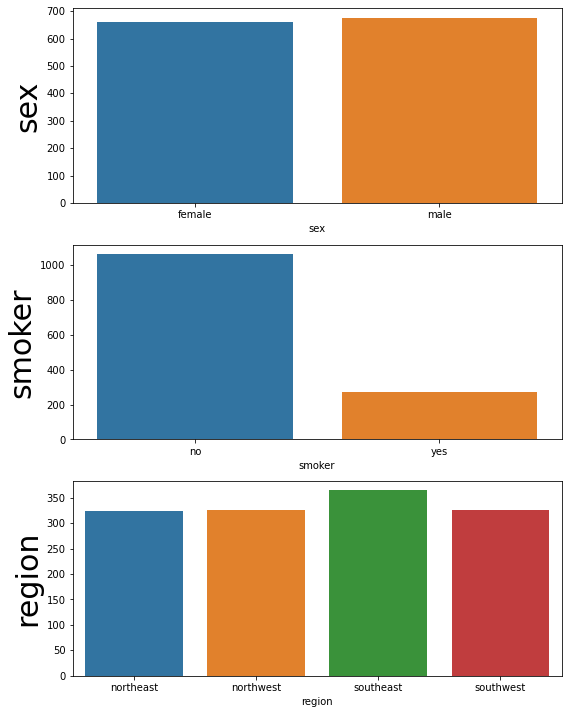

In [178]:
# create a list of all categorical variables
# include=category: selects the categoric features
df_categoric_features = df.select_dtypes(include='category')

# plot the count distribution for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 1, figsize=(8, 10))

# plot a count plot for all the categorical variables
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    
    # plot the count plot using countplot()
    # y: data on y axis
    # ax: specifies the axes object to draw the plot onto
    countplot = sns.countplot(x=df[variable], ax=subplot )
       
    # set the y-axis labels 
    # fontsize = 30: sets the font size to 30
    countplot.set_ylabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show()



From the above plot we see that:

The number of males are females are nearly equal
                        
Also the number of non smokers is significantly large 
                        
The different regions have distributed almost equally except the southeast which is slightly higher than all.

<a id='categorical_numerical'></a>
### 4.1.7 Analyze Relationship Between Target and Categorical Variables
The box-and-whisker plot is commonly used for visualizing relationships between numerical variables and categorical variables.

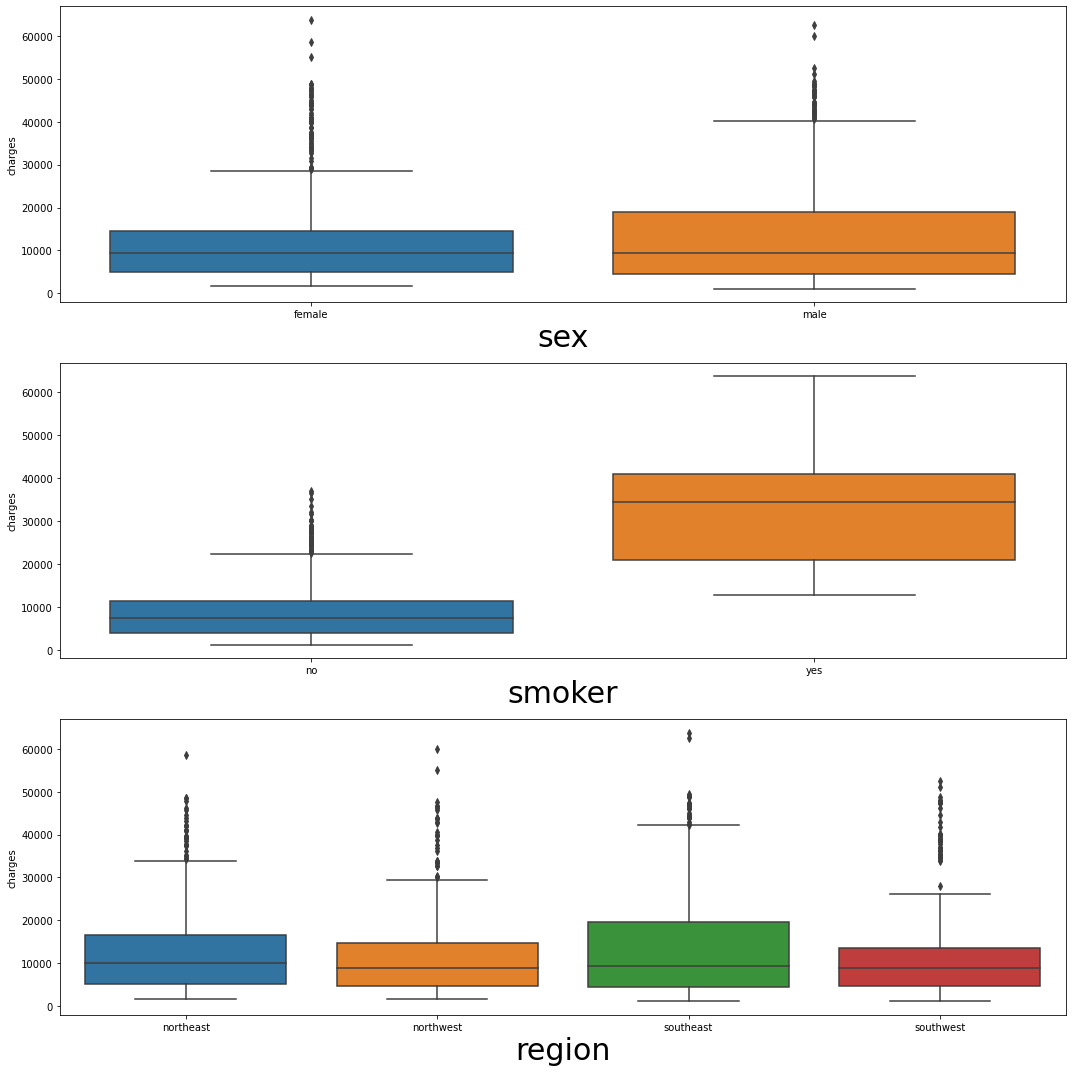

In [179]:
# plot the boxplot for each categorical variable 
# create subplots using subplots()
# 6 subplots in 3 rows and 1 columns
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

# plot a boxplot for all the categorical variables 
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    
    # x: variable on x-axis
    # y: variable in y-axis
    # data: dataframe to be used
    # ax: specifies the axes object to draw the plot onto
    boxplt = sns.boxplot(x=variable, y='charges', data=df, ax=subplot)
    
    # set the x-axis labels 
    # fontsize = 30: sets the font size to 30
    boxplt.set_xlabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show() 

As we can see the means of the charges across the gender are nearly the same.

The distribution of charges between the two categories, 'smoker' and 'non-smoker', are distinct enough to take smokers as a potentially good predictor of the charges amount.

We can see that the median of charges across the region are nearly equal and but the southeast charges have been distributed largely compared to others. This might have happened becuase the number of samples for the southeast is more.

<a id='outliers'></a>
### 4.1.8 Discover Outliers

#### Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

**Recollect that one of the assumptions of Linear Regression is there should be no outliers present in the data**

In order to detect outliers in numerical data, we perform the following:

                    1. Plot boxplot for numerical data
                    
                    2. Note the variables for which outliers are present
                    
                    3. Remove outliers by IQR method
                    
                    4. Plot boxplot to recheck for outliers

**1. Plot boxplot for numerical data**

In [180]:
df_numeric_features

,age,bmi,children,charges
0,19,27.900000,0,16884.924000
1,18,33.770000,1,1725.552300
2,28,33.000000,3,4449.462000
3,33,22.705000,0,21984.470610
4,32,28.880000,0,3866.855200
5,31,25.740000,0,3756.621600
6,46,33.440000,1,8240.589600
7,37,27.740000,3,7281.505600
8,37,29.830000,2,6406.410700
9,60,25.840000,0,28923.136920


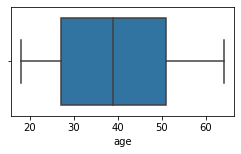

********************************************


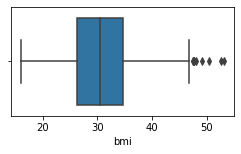

********************************************


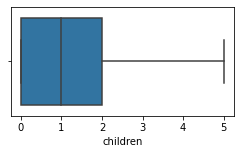

********************************************


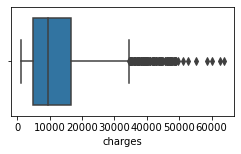

********************************************


In [181]:
for var in df_numeric_features.columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(df[var])
    plt.show()
    
    print('***********'*4)


**2. Note the variables for which outliers are present**

From the above plot, we notice that for the variable 'bmi' and 'charges' there are points above the upper extreme - these points are outliers

Let us use the IQR method to remove the outliers

Outliers can also be detected using standard deviation method if we know that the distribution of values in the sample is Gaussian or Gaussian-like

**3. Remove outliers by IQR method**

As we do not have sufficient data to analyze and train the model with a large sample, we are not going to remove the outliers. If needed we will transform the variables down the line.

<a id='Data_Preparation'></a>
## 4.2 Prepare the Data

<a id='Normality'></a>
### 4.2.1 Check for Normality

As per the assumptions of linear regression, residuals (actual values - predicted values) should be normally distributed. If the target variable is normally distributed then the residuals are also normally distributed, thus we check the normality only for target variable.

In order to check for normality of our target variable,

1. Plot a histogram and also perform the Jarque-Bera test 
                        
2. If the data is not normally distributed, use log transformation to get near normally distributed data
                        
3. Recheck for normality by plotting histogram and performing Jarque-Bera test

**1. Plot a histogram and also perform the Jarque-Bera test**

To plot a histogram, we use the hist() function from the matplotlib library

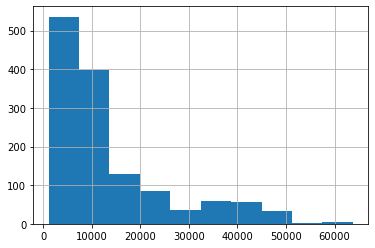

In [22]:
# check the distribution of target variable using hist()
df.charges.hist()

# display the plot
plt.show()

From the above plot, we can notice that the variable 'charges' is heavily right skewed and not normally distributed

We should not only make conclusions through visual representations or only using a statistical test but perform multiple ways to get the best insights

Let us perform the Jarque-Bera test to check the normality of the target variable.

The null and alternate hypothesis of Jarque-Bera test are as follows: <br>
    
    H0: The data is normally distributed
    H1: The data is not normally distributed

In [23]:
from scipy import stats
# normality test using jarque_bera()
# the test returns the the test statistics and the p-value of the test
stat, p = stats.shapiro(df["charges"])

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.815, p-value=0.000
The data is not normally distributed (reject H0)


It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the data is not normally distributed.
 
Now we opt for log transformation in order to reduce the skewness. We will log transform the claim variable. 

Usually for testing the normality of data, the Shaprio Wilk Test is used. However, it does not work if the number of observations are more than 5000 inspite it being more robust than other tests. In case where the observations are more than 5000, other tests like Anderson Darling test or Jarque Bera test may also be used. So we have used shapiro test

**2. If the data is not normally distributed, use log transformation to get near normally distributed data**

As mentioned above we opt for log transformation. The log transformation can be used to make highly skewed distributions less skewed. We use np.log() to log transform the 'claim' variable. We also store the transformed variable into our data frame with a new name, 'log_charges'.

In [24]:
# log transformation for normality using np.log()
df['log_charges'] = np.log(df['charges'])

# display first 5 rows of the data
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900000,0,yes,southwest,16884.924000,9.734176
1,18,male,33.770000,1,no,southeast,1725.552300,7.453302
2,28,male,33.000000,3,no,southeast,4449.462000,8.400538
3,33,male,22.705000,0,no,northwest,21984.470610,9.998092
4,32,male,28.880000,0,no,northwest,3866.855200,8.260197


**3. Recheck for normality by plotting histogram and performing Jarque-Bera test**

Let us first plot a histogram of `log_charges`

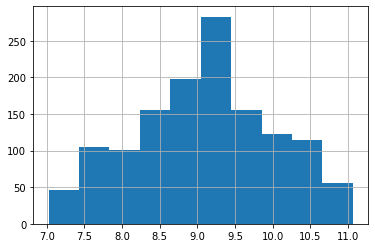

In [25]:
# recheck for normality 
# plot the histogram using hist
df.log_charges.hist()

# display the plot
plt.show()

It can be seen that the variable claim is near normally distributed. However we again confirm by Jarque Bera test

Let us perform Jarque Bera test

In [26]:
# recheck normality by Jarque-Bera test
# the test returns the the test statistics and the p-value of the test
statn, pv = jarque_bera(df['log_charges'])

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.815, p-value=0.000
The data is not normally distributed (reject H0)


It can be visually seen that the data has near-normal distribution, but Jarque Bera test does not support the claim
               
Note that in reality it might be very tough for your data to adhere to all assumptions your algorithm needs


<a id='one_way_anova'></a>
### 4.2.2 One-Way Anova 

Perform One-Way ANOVA to compare two means from two independent (unrelated) groups. For example, we apply ANOVA to see whether the mean of charges is significantly different across gender<br>

The null and alternate hypothesis of one-way anova are as follows:<br>

    H0: Population means all are equal
    H1: Population means are not all equal

#### One Way Anova for 'Sex' on 'Charges'

In [27]:
# perform one way anova for sex on claim using f_oneway()
f_oneway(df['charges'][df['sex'] == 'male'], 
             df['charges'][df['sex'] == 'female'])

F_onewayResult(statistic=4.3997016974374565, pvalue=0.03613272100596256)

The F-statistic = 68.99 and the p-value < 0.05, which indicates that there is a significant difference in the mean of the insurance charges across gender. We may consider building separate models for each gender. However, in this example we go ahead and build a single model for both genders.

<a id='dummy'></a>
### 4.2.3 Dummy Encoding of Categorical Variables

To build linear regression models we use OLS method. As seen before in section 4.1.2, it is seen that some variables are categorical. The OLS method fails to perform in presence of categorical variables. To overcome this we use dummy encoding.

We need to perform dummy encoding on our categorical variables before we proceed, since the method of OLS works only on numeric data.
                    In order to dummy encode, we do the following:
                    
                    1. Filter numerical and categorical variables
                    
                    2. Dummy encode the catergorical variables
                    
                    3. Concatenate numerical and dummy encoded categorical variables

**1. Filter numerical and categorical variables**

In [28]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['age', 'bmi', 'children', 'charges', 'log_charges'], dtype='object')

In [29]:
# filter the categorical features in the dataset using select_dtypes()
# include=category: selects the categoric features
df_categoric_features = df.select_dtypes(include='category')

# display categorical features
df_categoric_features.columns

Index(['sex', 'smoker', 'region'], dtype='object')

**2. Dummy encode the catergorical variables**

In [30]:
# create data frame with only categorical variables that have been encoded

# for all categoric variables create dummy variables
for col in df_categoric_features.columns.values:
    
    # for a feature create dummy variables using get_dummies()
    # prefix: specify the prefix before creating the dummy variable
    # "drop_first=True": creates 'n-1' dummy variables
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True)
    
    # concatenate the categoric features with dummy variables using concat()
    # axis=1: specifies that the concatenation is column wise
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    
    # drop the orginal categorical variable from the dataframe
    # axis=1: specifies that the column is to be dropped
    # inplace: makes permanent changes in the dataframe
    df_categoric_features.drop([col], axis=1, inplace=True)

**3. Concatenate numerical and dummy encoded categorical variables**

In [1]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features, df_categoric_features], axis=1)

# display data with dummy variables
df_dummy.head()

NameError: name 'pd' is not defined

Thus we have obtained the dummy coded variables.
                        
Note: Now the categorical variables are dummy encoded creating n-1 variables for each categorical variables, where n is the number of classes in each categorical variable. So for variable 'region', which has 4 levels, it has created 3 dummy encoded variables. Similarly, variable 'smoker' has 2 levels and it has created 1 dummy encoded variable.

There are various forms of encoding like n-1 dummy encoding, one hot encoding, label encoding, frequency encoding

Let us now proceed to train models. One model with the original charges variable and another model with the log transformed charges variable. We shall begin by fitting a linear regression model using the method of ordinary least square(OLS)

<a id='LinearRegression'></a>
## 5. Linear Regression (OLS)

<a id='slr'></a>
### 5.0 Simple Linear Regression (OLS)

In this section, we build a simple Linear model with linear regression using OLS (Ordinary Least Square). By simple linear model, we indicate that we consider only one independent variable that is present in the dataset.

In order to build the model, we do the following: 

                       1. Take one independent variable i.e age(you can choose other variable as well.
                       
                       2. Build model using sm.OLS().fit()
                       
                       3. Understand the model summary

**1. Choose one independent variable to build the model**

In [32]:
X = sm.add_constant(df_dummy.age)
y = df_dummy.charges

**2. Build model using sm.OLS().fit()**

In [33]:
# build a full model using OLS()
SLR = sm.OLS(y, X).fit()

# print the summary output
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           4.89e-29
Time:                        15:30:59   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.0

This model explains 0.89% of the variation in the dependent variable claim. The Durbin-Watson test statistics is 2.033 and indicates that there is no autocorrelation. The p-value of the JB test is nearly 0 and indicates that residuals are not normally distributed.

Let's use the log charges feature and check how the model performs. Now we will see Multi Linear Regression using multiple numerical and categorical independent variables. 

<a id='withLog'></a>
### 5.1 Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.

In order to build the model, we do the following:

                       1. Seperate the independent variables and dependent variable
                       
                       2. Build model using sm.OLS().fit()
                       
                       3. Understand the model summary

**1. Split the data into training and test sets**

In [34]:
# add the intercept column to the dataset
df_dummy = sm.add_constant(df_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop(['charges','log_charges'], axis=1)

# extract the target variable from the data set
y = df_dummy[['log_charges','charges']]

**2. Build model using sm.OLS().fit()**

Let's use the log claim future:

In [35]:
# build a full model using OLS()
# consider the log of charges 
linreg_full_model_withlog = sm.OLS(y["log_charges"], X).fit()

# print the summary output
print(linreg_full_model_withlog.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:30:59   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0306      0.072  

This model explains 76.4% of the variation in the dependent variable charges. we can also see that Adjusted R2 is close to R2 which tells us that variables might not insignificant. The Durbin-Watson test statistics is 2.046 and indicates that there is no autocorrelation. Condition Number 311 suggests that there is no much multicollinearity. But the Jarque bera test says that errors are not normally distributed.

<a id='me'></a>
### 5.2. Model Evaluation

Let's create a data frame that can store the model performance measures.

In [36]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])

# print the score card
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE


**Split the data into training and test sets to measure the model performance**

In [37]:
# add the intercept column to the dataset
df_dummy = sm.add_constant(df_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop(['charges','log_charges'], axis=1)

# extract the target variable from the data set
y = df_dummy[['log_charges','charges']]

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1003, 9)
The shape of X_test is: (335, 9)
The shape of y_train is: (1003, 2)
The shape of y_test is: (335, 2)


<a id='withoutLog'></a>
### 5.2.1 Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.

In this case, we do not consider any kind of transformation on the dependent variable, we use the 'charges' variable as it is.

 We do not need to do the train and test split again since it has been done while building the previous model
 
                       In order to build the model, we do the following:
                       
                       1. Build model using sm.OLS().fit()
                       
                       2. Predict the values using test set
                       
                       3. Compute the accuracy measures 
                       
                       4. Tabulate the results

**1. Build model using sm.OLS().fit()**

In [38]:
# ordinary least squares regression
# we use the data sets from the previous model
# however, now we shall build a model using the variable 'charges' 

# build a full model using OLS()
linreg_full_model_withoutlog = sm.OLS(y_train['charges'], X_train).fit()

# print the summary output
print(linreg_full_model_withoutlog.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     383.5
Date:                Mon, 06 Feb 2023   Prob (F-statistic):          1.23e-297
Time:                        15:30:59   Log-Likelihood:                -10160.
No. Observations:                1003   AIC:                         2.034e+04
Df Residuals:                     994   BIC:                         2.038e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.121e+04   1138.444  

As we can see that the R2 is 0.755 and the Adjusted R2 is 0.753, which means that the model explains about 75% variation in the dependent variable. And we can see that the R2 and the Adjust R2 is slightly descreased but nor a significant drop. And we can see that p-value of the F stats is less than 0.05 which means the model is significant. 

#### Calculate the p-values to know the insignificant variables

In [39]:
# calculate the p-values for all the variables
# create a dataframe using pd.DataFrame()
# columns: specifies the column names
linreg_full_model_withoutlog_pvalues = pd.DataFrame(linreg_full_model_withoutlog.pvalues, columns=["P-Value"])

# print the values
linreg_full_model_withoutlog_pvalues

,P-Value
const,0.000000
age,0.000000
bmi,0.000000
children,0.024479
sex_male,0.486792
smoker_yes,0.000000
region_northwest,0.666258
region_southeast,0.121557
region_southwest,0.224862


The above table shows the p-values for all the variables to decide the significant variables

Let's create a list of insignificant variables

In [40]:
# select insignificant variables
insignificant_variables = linreg_full_model_withoutlog_pvalues[
                                                        linreg_full_model_withoutlog_pvalues['P-Value']  > 0.05]

# get the position of a specified value
insigni_var = insignificant_variables.index

# convert the list of variables to 'list' type
insigni_var = insigni_var.to_list()

# get the list of insignificant variables
insigni_var

['sex_male', 'region_northwest', 'region_southeast', 'region_southwest']

These are the insignificant variables because their p-value is greater than 0.05.

Notice, the variable 'sex_male' is insignificant. It implies that a persons gender does not affect the charges. Hence, we shall consider this variable to be insignificant.

Similarly for the variable region, none of the regions is significantly contributing to the target variable. So we shall exclude the variable.

**2. Predict the values using test set**

In [41]:
# predict the charges using predict()
predicted_claim = linreg_full_model_withoutlog.predict(X_test)

# extract the 'charges' values from the test data
actual_claim = y_test['charges']

**3. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [42]:
# calculate rmse using rmse()
linreg_full_model_withoutlog_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_full_model_withoutlog_rsquared = linreg_full_model_withoutlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withoutlog_rsquared_adj = linreg_full_model_withoutlog.rsquared_adj 

**4. Tabulate the results**

In [43]:
# compile the required information
linreg_full_model_withoutlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model without log of target variable",
                     'RMSE':linreg_full_model_withoutlog_rmse,
                     'R-Squared': linreg_full_model_withoutlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withoutlog_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_full_model_withoutlog_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.755314,0.753344,5982.567065


On comparing the above models, it is seen that the R-squared and the Adjusted R-squared value for the model considering log transformation of the variable 'charges' is higher than the other model, but not a significantly higher.

As we can see that the RMSE value of the above model is 5982.5, and we aim to minimize as much as we can.

<a id='Assumptions'></a>
### 5.3 Check the Assumptions of the Linear Regression

Now we perform test for checking presence of Autocorrelation and Heteroskedasticity.

<a id='Autocorrelation'></a>
### 5.3.2.1 Detecting Autocorrelation

Autocorrelation (also called serial correlation) refers to the degree of correlation between the values of the same variables across different observations in the data. One of the assumptions of the linear regression is that there should not be autocorrelation.

The Durbin Watson Test is a measure of autocorrelation in residuals from the regression analysis.
Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

The null and alternate hypothesis of Durbin-Watson test is as follows: <br>
        
          H0: There is no autocorrelation in the residuals
          H1: There is autocorrelation in the residuals

**The test stats value is nearly equal to 2*(1-r), Here r is the sample autocorrelation of the residuals. If r == 0, then we can say that no serial correlation and the test statistic equals 2. This statistic always is between 0 and 4.
If the test statistic is near to or closer to 0 then there will be more evidence to say that positive serial correlation. and if the test stats value is near to or closer to 4, then we can say that more evidence for negative serial correlation**

**From the summary output in section 5.3.1, we see that the Durbin-Watson static is  1.980**

**Hence we can conclude that there is no autocorrelation**

<a id='Heteroskedasticity'></a>
### 5.3.2.2 Detecting Heteroskedasticity
Heteroskedasticity is a systematic change in the spread of the residuals over the range of measured values. One of the assumptions of the linear regression is that there should not be Heteroskedasticity.

Breusch-Pagan is the test for detecting heteroskedasticity:

The null and alternate hypothesis of Breusch-Pagan test is as follows:<BR>
    
    H0: The residuals are homoskedastic
    H1: The residuals are not homoskedastic

In [44]:
# create vector of result parmeters
name = ['f-value','p-value']           

# perform Breusch-Pagan test using het_breushpagan()
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(linreg_full_model_withoutlog.resid, linreg_full_model_withoutlog.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
lzip(name, test)           

[('f-value', 89.60948242065449), ('p-value', 5.581587688547543e-16)]

We observe that p-value is less than 0.05 and thus reject the null hypothesis. We conclude that there is heteroskedasticity present in the data. In real life it might not be possible to meet all the assumptions of linear regression.

<a id='Linearity_of_Residuals'></a>
### 5.3.2.3 Linearity of Residuals

Multiple linear regression requires the relationship between the independent and dependent variables to be linear, i.e. it should be linear in the parameters. The linearity assumption can best be tested with scatterplots.<br><br>The independent variables must have a linear relationship with the dependent variable.

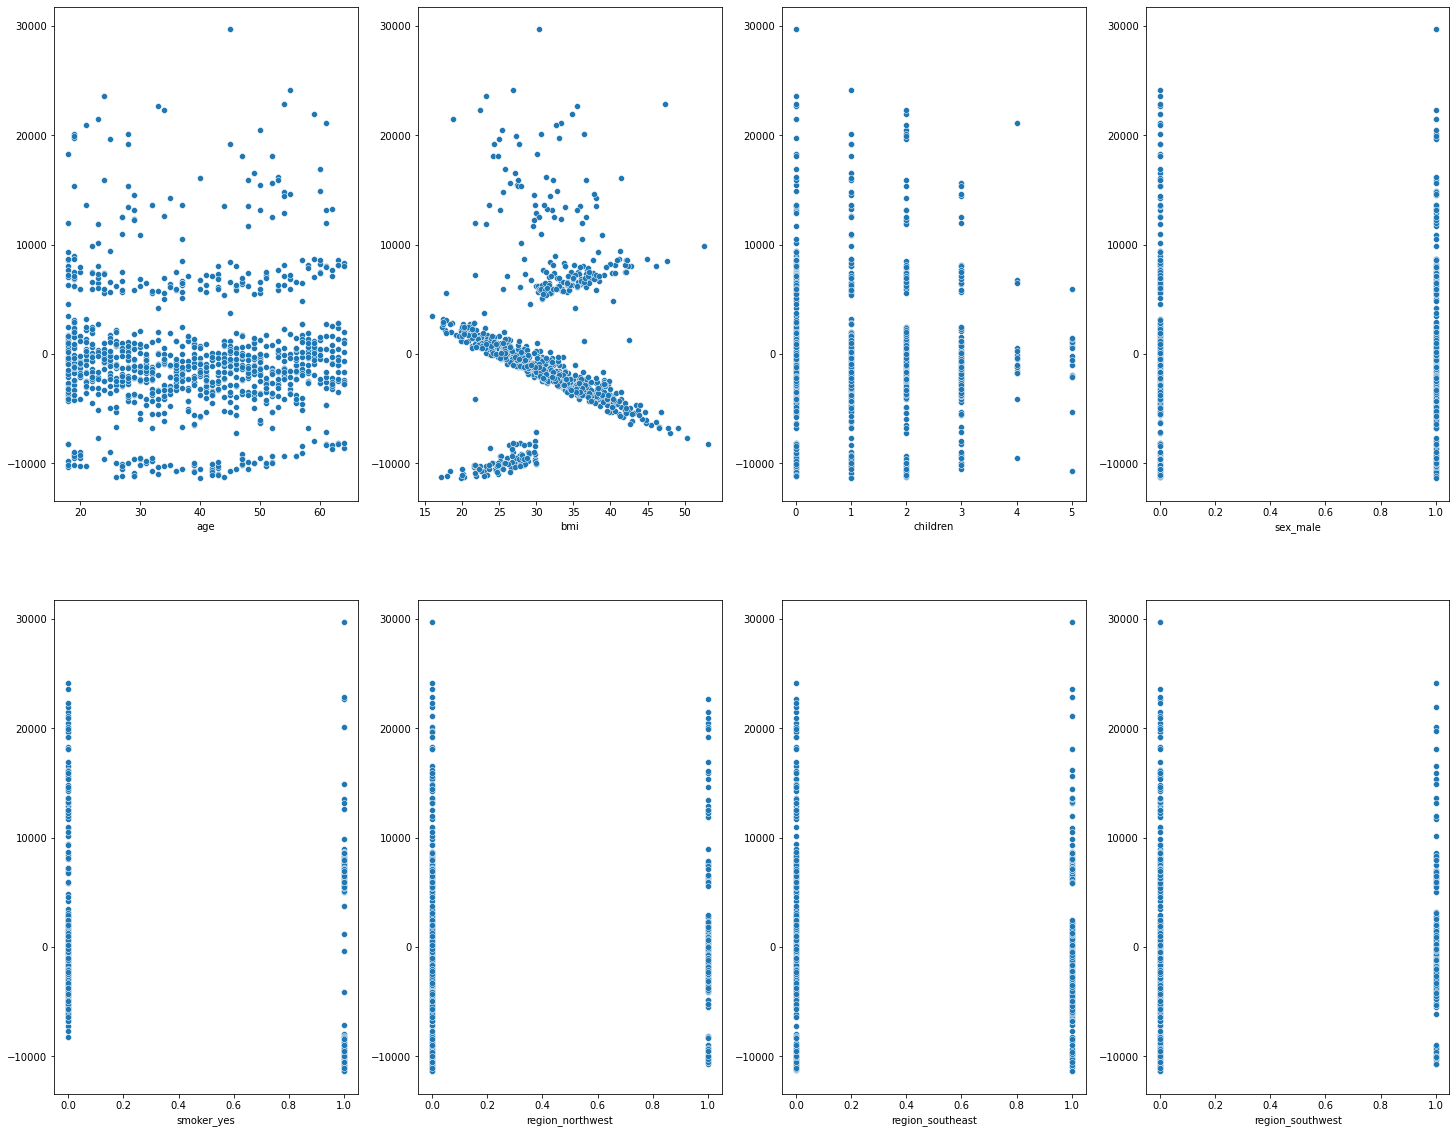

In [45]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 2, ncols= 4, figsize=(25, 20))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train.columns[1:], ax.flatten()):
    sns.scatterplot(X_train[variable], linreg_full_model_withoutlog.resid , ax=subplot)

# display the plot
plt.show()

From the plots we see that none of the plots show a specific pattern much. Hence, we may conclude that the variables are linearly related to the dependent variable.

<a id='Normality_of_Residuals'></a>
### 5.3.2.4 Normality of Residuals

The assumption of normality is an important assumption for many statistical tests. The normal Q-Q plot is one way to assess normality. The quantile-quantile(Q-Q) is a scatter plot that will help in validating the assumption of normal distribution in a data set.

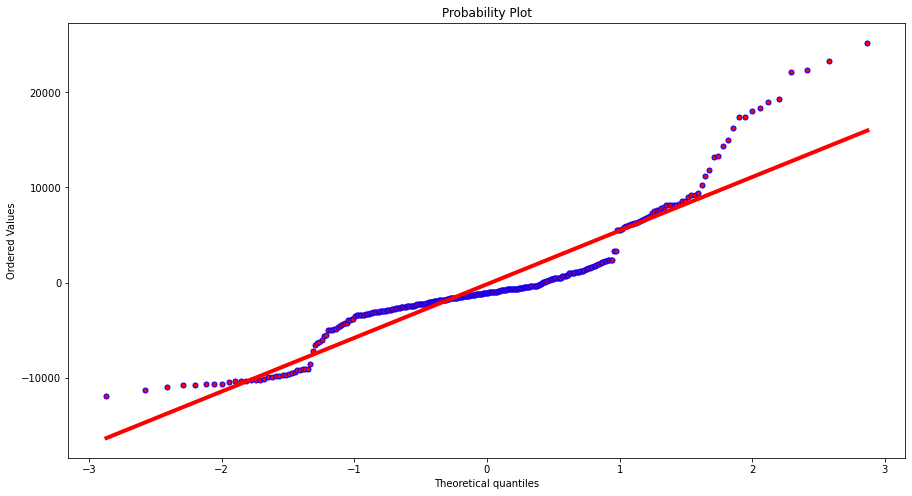

In [46]:
# calculate fitted values
fitted_vals = linreg_full_model_withoutlog.predict(X_test)

# calculate residuals
resids = actual_claim - fitted_vals

# create subplots using subplots() such that there is one row having one plot
# 'figsize' sets the figure size
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# plot the probability plot to check the normality of the residuals
# plot: if specified plots the least squares fit
stats.probplot(resids, plot=plt)

# set the marker type using the set_marker() parameter
# access the line object from the axes object using ax.get_lines()
# then, the properties can be changed accordingly
# set the marker to 'o' to use circles as points
ax.get_lines()[0].set_marker('o')

# set the marker size using the set_markersize() parameter
# set the marker size to 5
ax.get_lines()[0].set_markersize(5.0)

# set the color of the trend line using set_markerfacecolor()
# set color of the trend line to red by passing 'r' to the set_markerfacecolor
ax.get_lines()[0].set_markerfacecolor('r')

# set the trend line width
ax.get_lines()[1].set_linewidth(4.0)

# display the plot
plt.show()

Using this plot, we can infer that the residuals do not come from a normal distribution. This is expected as our target variable is not normally distributed.

**The mean of the residuals always equals zero (assuming that your line is actually the line of “best fit”)** 

In [47]:
# check the mean of the residual
linreg_full_model_withoutlog.resid.mean()

1.1891439201445843e-11

The mean of the residuals is very much closer to zero. Therefore, we can say that linearity is present.

**Perform Jarque Bera test to check normality of the residuals**

In [48]:
# normality test using 'jarque_bera'
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(resids)

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=231.440, p-value=0.000
The data is not normally distributed (reject H0)


It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the residuals is not normally distributed.

**After File 8 Interaction Effect**

**Hands-on video number 5**

<a id='Interaction'></a>
### 5.4 Linear Regression with Interaction (OLS)

Let us now see the effect on the linear regression model on adding an interaction effect of two significant variables

An interaction effect occurs when the effect of one variable depends on another variable. This combined effect may or may not improve the performance of the model

Comparing the coefficient of determination with and without the interaction term:<br>
The model for which interaction term is considered, the coefficient of determination may vary. It is crucial to check for the significance of the interaction term. If the term is found to be significant then the coefficient of determination increases. If the term is not significant, there is not much change in the coefficient of determination.



In order to build the model, we do the following:

                       1. Compute the interaction effect
                       
                       2. Split the data into training and test sets
                       
                       3. Build model using sm.OLS().fit()
                       
                       4. Predict the values using test set
                       
                       5. Compute accuracy measures
                       
                       6. Tabulate the results

**1. Compute the interaction effect**

In [49]:
# create a copy of the entire dataset to add the interaction effect using copy()
df_interaction = df_dummy.copy()

# add the interaction variable
df_interaction['bmi_mul_smoker'] = df_interaction['bmi']*df_interaction['smoker_yes'] 

# print the data with interaction
df_interaction.head()

,const,age,bmi,children,charges,log_charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_mul_smoker
0,1.000000,19,27.900000,0,16884.924000,9.734176,0,1,0,0,1,27.900000
1,1.000000,18,33.770000,1,1725.552300,7.453302,1,0,0,1,0,0.000000
2,1.000000,28,33.000000,3,4449.462000,8.400538,1,0,0,1,0,0.000000
3,1.000000,33,22.705000,0,21984.470610,9.998092,1,0,1,0,0,0.000000
4,1.000000,32,28.880000,0,3866.855200,8.260197,1,0,1,0,0,0.000000


**2. Split the data into training and test sets**

Notice that there is a change in the data set. We have added a variable(bmi*smoker), we consider this data as our new data. We again spilt the data into a train and test set keeping the random_state as the same as before (please refer section 5.1 to confirm)

In [50]:
# separate the independent and dependent variables
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped
X = df_interaction.drop(['charges','log_charges'], axis=1)

# extract the target variable from the train set
y = df_interaction['charges']

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_interaction, X_test_interaction, y_train, y_test = train_test_split( X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train_interaction is:",X_train_interaction.shape)

# print dimension of predictors test set
print("The shape of X_test_interaction is:",X_test_interaction.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train_interaction is: (1003, 10)
The shape of X_test_interaction is: (335, 10)
The shape of y_train is: (1003,)
The shape of y_test is: (335,)


**3. Build model using sm.OLS().fit()**

In [51]:
# building a full model with an interaction term using OLS()
linreg_with_interaction = sm.OLS(y_train, X_train_interaction).fit()

# print the summary output
print(linreg_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     585.2
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:31:00   Log-Likelihood:                -9942.7
No. Observations:                1003   AIC:                         1.991e+04
Df Residuals:                     993   BIC:                         1.995e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1774.7556   1003.103  

This model explains 84.1% of the variation in dependent variable charges.The Durbin-Watson test statistics is 2.030 and indicates that the is no autocorrelation. The Condition Number is 663 suggests that there is a moderate(low) collinearity. The collinearity is likely to increase because of the interaction effect.

**4. Predict the values using test set**

In [52]:
# predict the 'charges' using predict()
predicted_claim = linreg_with_interaction.predict(X_test_interaction)

# extract the 'charges' values from the test data
actual_claim = y_test

**5. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [53]:
# calculate rmse using rmse()
linreg_with_interaction_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_with_interaction_rsquared = linreg_with_interaction.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_with_interaction_rsquared_adj = linreg_with_interaction.rsquared_adj 

**6. Tabulate the results**

In [54]:
# compile the required information
linreg_with_interaction_metrics = pd.Series({
                     'Model_Name': "linreg_with_interaction",
                     'RMSE': linreg_with_interaction_rmse,
                     'R-Squared': linreg_with_interaction_rsquared,
                     'Adj. R-Squared': linreg_with_interaction_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_with_interaction_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.755314,0.753344,5982.567065
1,linreg_with_interaction,0.841378,0.839940,4672.893439


From the summary output, the interaction component has a p-value of 0 indicating it is highly significant. The R-squared and adjusted R-squared value have also significantly increased. This output justifies that addition of an interaction effect has positively contributed to the performance of the model.

**With the above topics we stop the week 1 session, We will see more methods and techniques in the upcoming weeks.**